In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
import sys
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from cleantext import clean

Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.


In [3]:
# Downloading nltk data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [4]:
data_apple = pd.read_csv('DataDNA_Dataset_Challenge_March_2023.csv', encoding='latin-1')

In [5]:
data_apple.head()

,index,product,helpful_count,total_comments,url,review_country,reviewed_at,review_text,review_rating,product_company,profile_name,review_title
0,0,Apple iPhone XR (64GB) - Black,"5,087 people found this helpful",24,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,12/12/2018,NOTE:,3.0 out of 5 stars,Apple,Sameer Patil,"Which iPhone you should Purchase ? iPhone 8, X..."
1,1,Apple iPhone XR (64GB) - Black,"2,822 people found this helpful",6,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,11/17/2018,Very bad experience with this iPhone xr phone....,1.0 out of 5 stars,Apple,Amazon Customer,Don't buy iPhone xr from Amazon.
2,2,Apple iPhone XR (64GB) - Black,"1,798 people found this helpful",0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,1/27/2019,Amazing phone with amazing camera coming from ...,5.0 out of 5 stars,Apple,A,Happy with the purchase
3,3,Apple iPhone XR (64GB) - Black,"1,366 people found this helpful",14,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,5/2/2019,So I got the iPhone XR just today. The product...,1.0 out of 5 stars,Apple,Shubham Dutta,Amazon is not an apple authorised reseller. Pl...
4,4,Apple iPhone XR (64GB) - Black,536 people found this helpful,5,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,5/24/2019,I've been an android user all my life until I ...,5.0 out of 5 stars,Apple,Nepuni Lokho,Excellent Battery life and buttery smooth UI


In [6]:
data_apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5010 entries, 0 to 5009
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   index            5010 non-null   int64 
 1   product          5010 non-null   object
 2   helpful_count    5010 non-null   object
 3   total_comments   5010 non-null   int64 
 4   url              5010 non-null   object
 5   review_country   5010 non-null   object
 6   reviewed_at      5010 non-null   object
 7   review_text      5007 non-null   object
 8   review_rating    5010 non-null   object
 9   product_company  5010 non-null   object
 10  profile_name     5010 non-null   object
 11  review_title     5008 non-null   object
dtypes: int64(2), object(10)
memory usage: 469.8+ KB


In [7]:
data_apple.sample(50)

,index,product,helpful_count,total_comments,url,review_country,reviewed_at,review_text,review_rating,product_company,profile_name,review_title
855,855,Apple iPhone XR (64GB) - Black,0,0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,10/1/2019,Service is very good by Amazon.,4.0 out of 5 stars,Apple,Puran Singh,Over all good...
4577,4577,Apple iPhone XR (64GB) - Black,0,0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,10/10/2019,Super phone â¤ï¸â¤ï¸,5.0 out of 5 stars,Apple,Akkubabu,Super phone â¤ï¸â¤ï¸
1804,1804,Apple iPhone XR (64GB) - Black,0,0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,10/2/2019,Great product ... Got it on amazon indian fest...,5.0 out of 5 stars,Apple,Nikhilpm,Amazing phone for 40K
2711,2711,Apple iPhone XR (64GB) - Black,0,0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,10/16/2019,Excellent,5.0 out of 5 stars,Apple,Mehul Patel,Excellent product
4166,4166,Apple iPhone XR (64GB) - Black,0,0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,3/2/2020,Everything at itâs best,5.0 out of 5 stars,Apple,vivek shinde,Best phone
4993,4993,Apple iPhone XR (64GB) - Black,0,0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,7/5/2019,Bad,1.0 out of 5 stars,Apple,Amir Khan,Bad phone
2299,2299,Apple iPhone XR (64GB) - Black,0,0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,11/10/2019,Disappointed with battery life of the phone,4.0 out of 5 stars,Apple,supriya bhardwaj,Poor battery life
474,474,Apple iPhone XR (64GB) - Black,One person found this helpful,0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,8/28/2019,I just love it.it has got all I want.good came...,4.0 out of 5 stars,Apple,Fff,Good job by apple
81,81,Apple iPhone XR (64GB) - Black,2 people found this helpful,0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,8/25/2019,Before I start this review Iâll let you know...,5.0 out of 5 stars,Apple,Kevin,Great hardware + Stunning software = 1 magical...
3566,3566,Apple iPhone XR (64GB) - Black,0,0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,10/19/2019,Fingerprit and Battery is Good,5.0 out of 5 stars,Apple,Pushpendra Singh,Superb Phone


## Data cleaning tasks

> 1. Remove/delete the following columns: index, product, url, review_country, and product_company
> 2. Convert helpful_count column to int64
> 3. Extract numbers writing in strings/object format in the helpful_count column and convert them to appropriate numbers/int64
> 4. Rename helpful_count column to helpful_vote
> 5. Convert reviewed_at column to date format from object/string format
> 6. Remove special characters from review_text column
> 7. Convert the texts in the review_text column to lowercase for homogeneity
> 8. Extract the rating values from the review_rating column and retain only the actual rating, removing the other texts.
> 9. Convert review rating values to ordinal data
> 10. Create a new column "word count" to indicate the number of words in the review text
> 11. Convert all the texts in the profile_name column to lowercase

In [8]:
# Checking the unique values in product column
unique_values_product = data_apple['product'].unique()
print(unique_values_product)

['Apple iPhone XR (64GB) - Black']


The dataset solely consists of reviews for Apple iPhone XR product

In [9]:
# Checking the unique values in helpful_count column
unique_values_helpful_count = data_apple['helpful_count'].unique()
print(unique_values_helpful_count)

['5,087 people found this helpful' '2,822 people found this helpful'
 '1,798 people found this helpful' '1,366 people found this helpful'
 '536 people found this helpful' '313 people found this helpful'
 '189 people found this helpful' '164 people found this helpful'
 '124 people found this helpful' '94 people found this helpful'
 '88 people found this helpful' '69 people found this helpful'
 '63 people found this helpful' '60 people found this helpful'
 '55 people found this helpful' '62 people found this helpful'
 '45 people found this helpful' '53 people found this helpful'
 '54 people found this helpful' '38 people found this helpful'
 '35 people found this helpful' '32 people found this helpful'
 '28 people found this helpful' '26 people found this helpful'
 '29 people found this helpful' '24 people found this helpful'
 '19 people found this helpful' '23 people found this helpful'
 '16 people found this helpful' '25 people found this helpful'
 '15 people found this helpful' '14 pe

In [10]:
# Checking the unique values in total_comments column
unique_values_total_comments = data_apple['total_comments'].unique()
print(unique_values_total_comments)

[24  6  0 14  5  2  3  1]


In [11]:
# Counting the number of zeros in total_comments column
count_zeros = data_apple['total_comments'].value_counts().get(0, 0)
print("Number of zeros in the total_comments column:", count_zeros)

Number of zeros in the total_comments column: 4954


In [12]:
# Checking the unique values in review_country column
unique_values_review_country = data_apple['review_country'].unique()
print(unique_values_review_country)

[' India ']


The dataset solely consists of reviews for Apple iPhone XR product from Indian consumers

In [13]:
# Checking the unique values in reviewed_at column
unique_values_reviewed_at = data_apple['reviewed_at'].unique()
print(unique_values_reviewed_at)

['12/12/2018' '11/17/2018' '1/27/2019' '5/2/2019' '5/24/2019' '4/22/2019'
 '12/7/2018' '11/25/2018' '4/27/2019' '4/21/2019' '7/21/2019' '4/4/2019'
 '4/12/2019' '6/4/2019' '11/27/2018' '9/24/2019' '12/9/2018' '1/1/2019'
 '6/6/2019' '2/6/2019' '7/13/2019' '4/24/2019' '2/5/2020' '9/10/2019'
 '4/11/2019' '4/15/2019' '5/14/2019' '11/26/2018' '10/7/2019' '11/1/2018'
 '5/18/2019' '6/17/2019' '8/16/2019' '8/13/2019' '11/12/2018' '6/11/2019'
 '9/15/2019' '3/10/2019' '5/25/2019' '5/5/2019' '8/9/2019' '8/22/2019'
 '12/9/2019' '11/28/2018' '6/25/2019' '11/24/2018' '7/22/2019' '8/8/2019'
 '3/27/2019' '1/21/2019' '7/16/2019' '9/4/2019' '4/17/2019' '6/3/2019'
 '7/18/2019' '9/30/2019' '6/16/2019' '10/27/2019' '12/3/2018' '10/3/2019'
 '1/29/2020' '7/9/2019' '11/24/2019' '6/1/2019' '1/17/2020' '10/8/2019'
 '8/25/2019' '5/7/2019' '8/10/2019' '11/29/2019' '8/1/2019' '10/2/2019'
 '11/4/2019' '8/23/2019' '10/10/2019' '1/19/2020' '8/11/2019' '1/15/2020'
 '9/29/2019' '10/20/2019' '10/14/2019' '3/13/2019' '10/

In [14]:
# Checking the unique values in profile_name column
unique_values_profile_name = data_apple['profile_name'].unique()
print(unique_values_profile_name)

['Sameer Patil' 'Amazon Customer' 'A' ... 'Shreya' 'murali hv'
 'basil john p']


In [15]:
# Checking the consumers' names and the number of times they reviewed the product
profile_name_counts = data_apple['profile_name'].value_counts()

# Create a new DataFrame to display the unique values and their respective counts
profile_name_counts_df = pd.DataFrame({'profile_name': profile_name_counts.index, 'count': profile_name_counts.values})

# Print the DataFrame
print(profile_name_counts_df)

                          profile_name  count
0                      Amazon Customer    550
1                               Deepak      8
2                               Gaurav      8
3                                 Amit      8
4                               Vishal      8
...                                ...    ...
4094                                D       1
4095                              Rani      1
4096                      Shruti Naidu      1
4097  Is that water resistance phone ?      1
4098                      basil john p      1

[4099 rows x 2 columns]


In [16]:
# Deleting unwanted columns from the dataset
data_apple.drop(['index', 'product', 'url', 'review_country', 'product_company'], axis=1, inplace=True)


In [17]:
data_apple['helpful_count'] = data_apple['helpful_count'].str.replace(',', '')  # Remove commas from numbers
data_apple['helpful_count'] = data_apple['helpful_count'].str.extract(r'^(\d+)')
data_apple['helpful_count'] = data_apple['helpful_count'].astype(float).astype('Int64')

### Hints:

> The provided code performs the following operations on the 'helpful_count' column in the data_apple DataFrame:

> It removes commas from the numbers in the column by using the .str.replace(',', '') method.

> It extracts the numbers at the beginning of each string in the column using the .str.extract(r'^(\d+)') method with the regular expression r'^(\d+)'. The regular expression matches one or more digits at the start of the string.

> It converts the column to floating-point numbers using the .astype(float) method. This allows the column to handle decimal values if present.

> It converts the column to the nullable integer type ('Int64') using the .astype('Int64') method. The nullable integer type supports missing or NaN values, allowing proper handling of missing data in the 'helpful_count' column.

> By performing these operations, the code ensures that the 'helpful_count' column contains only numeric values without commas, and it handles missing values appropriately by representing them as NaN using the nullable integer type.

In [18]:
data_apple.head()

,helpful_count,total_comments,reviewed_at,review_text,review_rating,profile_name,review_title
0,5087,24,12/12/2018,NOTE:,3.0 out of 5 stars,Sameer Patil,"Which iPhone you should Purchase ? iPhone 8, X..."
1,2822,6,11/17/2018,Very bad experience with this iPhone xr phone....,1.0 out of 5 stars,Amazon Customer,Don't buy iPhone xr from Amazon.
2,1798,0,1/27/2019,Amazing phone with amazing camera coming from ...,5.0 out of 5 stars,A,Happy with the purchase
3,1366,14,5/2/2019,So I got the iPhone XR just today. The product...,1.0 out of 5 stars,Shubham Dutta,Amazon is not an apple authorised reseller. Pl...
4,536,5,5/24/2019,I've been an android user all my life until I ...,5.0 out of 5 stars,Nepuni Lokho,Excellent Battery life and buttery smooth UI


In [19]:
data_apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5010 entries, 0 to 5009
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   helpful_count   4495 non-null   Int64 
 1   total_comments  5010 non-null   int64 
 2   reviewed_at     5010 non-null   object
 3   review_text     5007 non-null   object
 4   review_rating   5010 non-null   object
 5   profile_name    5010 non-null   object
 6   review_title    5008 non-null   object
dtypes: Int64(1), int64(1), object(5)
memory usage: 279.0+ KB


In [20]:
# Converting reviewed_at column to datatime format
data_apple['reviewed_at'] = pd.to_datetime(data_apple['reviewed_at'])

In [21]:
# Renaming reviewed_at column to review_date, and helpful_count to helpful vote
data_apple = data_apple.rename(columns={'reviewed_at': 'review_date'})
data_apple = data_apple.rename(columns={'helpful_count': 'helpful_vote'})

In [22]:
# Creating a function to clean up the review_text column for irrelevant information
def clean_text(text):
    # Handle missing values
    if pd.isnull(text):
        return ''
    
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove emojis
    text = clean(text, no_emoji=True)
    # Remove special characters and numbers
    text = re.sub('[^a-zA-Z]', ' ', text)
    # Convert to lowercase
    text = text.lower()
    # Remove punctuations
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize the text data
    tokens = nltk.word_tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.lower() not in stop_words]
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Join the tokens back into a string
    text = ' '.join(tokens)
    return text

In [23]:
# Applying the function to the review_text column of the dataframe
data_apple['review_text'] = data_apple['review_text'].fillna('').apply(clean_text)

In [24]:
data_apple.head()

,helpful_vote,total_comments,review_date,review_text,review_rating,profile_name,review_title
0,5087,24,2018-12-12,note,3.0 out of 5 stars,Sameer Patil,"Which iPhone you should Purchase ? iPhone 8, X..."
1,2822,6,2018-11-17,bad experience iphone xr phone back camera fou...,1.0 out of 5 stars,Amazon Customer,Don't buy iPhone xr from Amazon.
2,1798,0,2019-01-27,amazing phone amazing camera coming iphone plu...,5.0 out of 5 stars,A,Happy with the purchase
3,1366,14,2019-05-02,got iphone xr today product look amazing unfor...,1.0 out of 5 stars,Shubham Dutta,Amazon is not an apple authorised reseller. Pl...
4,536,5,2019-05-24,android user life decided try iphone xr io lov...,5.0 out of 5 stars,Nepuni Lokho,Excellent Battery life and buttery smooth UI


In [25]:
# Extracting the exact review rating in the review_rating column
data_apple['review_rating'] = data_apple['review_rating'].str.extract(r'^(\d)')

In [26]:
# Converting all review_title column values to lowercase
data_apple['review_title'] = data_apple['review_title'].str.lower()

In [27]:
# Applying the function to the review_title column of the dataframe
data_apple['review_title'] = data_apple['review_title'].fillna('').apply(clean_text)

In [28]:
# Replacing N/A values in helpful_count column with zeros (0)
data_apple['helpful_vote'] = data_apple['helpful_vote'].fillna(0)

In [29]:
# Convert the 'profile_name' column to lowercase
data_apple['profile_name'] = data_apple['profile_name'].str.lower()

# Data transformation and Feature Engineering

In [30]:
# Convert the review_rating column to numeric (float)
data_apple['review_rating'] = data_apple['review_rating'].astype(float)

# Create a dictionary to map review ratings to labels
rating_labels = {
    1.0: 'Very Bad',
    2.0: 'Bad',
    3.0: 'Neutral',
    4.0: 'Good',
    5.0: 'Excellent'
}

# Use the map() function to create the new feature column
data_apple['review_rating_label'] = data_apple['review_rating'].map(rating_labels)


In [31]:
# Create a new column 'word_count' with the word count of each review text
data_apple['word_count'] = data_apple['review_text'].apply(lambda x: len(x.split()))

# Print the DataFrame to see the new 'word_count' column
print(data_apple[['review_text', 'word_count']])

                                            review_text  word_count
0                                                  note           1
1     bad experience iphone xr phone back camera fou...          22
2     amazing phone amazing camera coming iphone plu...          10
3     got iphone xr today product look amazing unfor...          74
4     android user life decided try iphone xr io lov...          42
...                                                 ...         ...
5005                                            dhamaka           1
5006                                            goodbye           1
5007                                            nothing           1
5008                                            superbb           1
5009                                            nothing           1

[5010 rows x 2 columns]


In [32]:
data_apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5010 entries, 0 to 5009
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   helpful_vote         5010 non-null   Int64         
 1   total_comments       5010 non-null   int64         
 2   review_date          5010 non-null   datetime64[ns]
 3   review_text          5010 non-null   object        
 4   review_rating        5010 non-null   float64       
 5   profile_name         5010 non-null   object        
 6   review_title         5010 non-null   object        
 7   review_rating_label  5010 non-null   object        
 8   word_count           5010 non-null   int64         
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 357.3+ KB


In [33]:
data_apple.sample(50)

,helpful_vote,total_comments,review_date,review_text,review_rating,profile_name,review_title,review_rating_label,word_count
2469,0,0,2019-12-31,one best,5.0,nadim ansari,best offer till,Excellent,2
4242,0,0,2019-10-01,nice product luv,5.0,vansh dynamo,nice one,Excellent,3
399,0,0,2019-11-08,always thought buy iphone every time used thin...,5.0,amit singh,finally got many conclusion,Excellent,41
564,0,0,2020-02-19,face recognition battery life user interface s...,5.0,surya kiran majji,apple enough,Excellent,18
1338,0,0,2019-10-01,excellent great product good build quality goo...,5.0,venkateswara rao,real value money,Excellent,8
44,17,0,2019-08-13,appario seem fraud shipment smartly tampered m...,1.0,amazon customer,tampered shipment product,Very Bad,26
1829,0,0,2019-08-24,good response time face unlock excellent camer...,5.0,mahesh,overall good,Excellent,10
3483,0,0,2019-10-26,amazing phone,5.0,varun goel,amazing,Excellent,2
1772,0,0,2019-12-01,phone mobile comparison best gift husband nice...,5.0,subhasmita mallick,awesome,Excellent,8
3928,0,0,2019-10-09,great,5.0,james adinarayana,great,Excellent,1


In [34]:
# Saving the cleaned data to a new CSV file
data_apple.to_csv('cleaned_data_apple.csv', index=False)

# Exploratory Data Analysis (EDA)

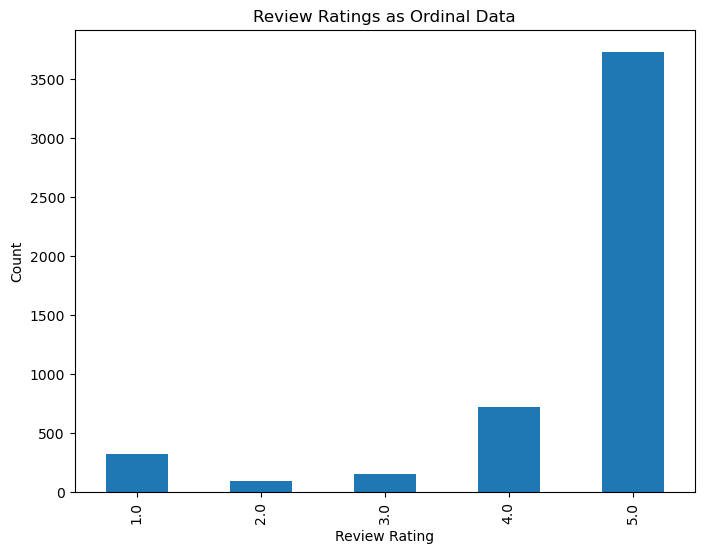

In [35]:
# Plot the review ratings as ordinal data using a bar plot
plt.figure(figsize=(8, 6))
data_apple['review_rating'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Review Rating')
plt.ylabel('Count')
plt.title('Review Ratings as Ordinal Data')
plt.show()

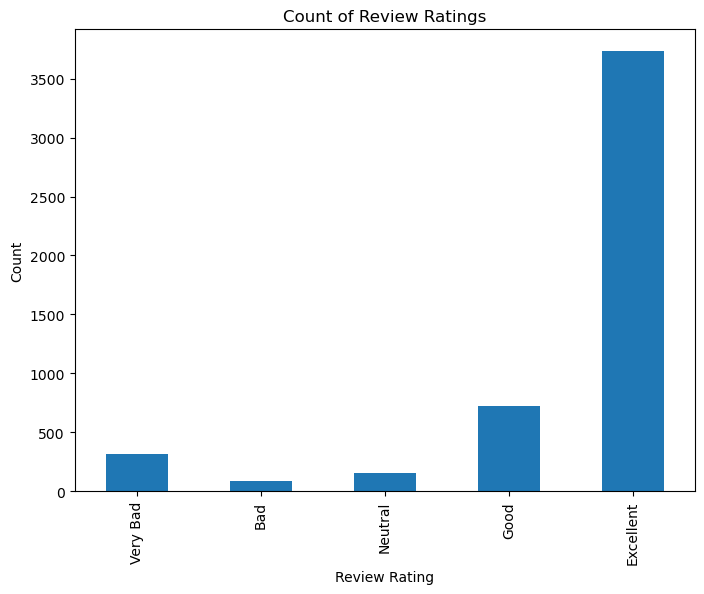

In [36]:
# Plot the review ratings as ordinal data using a bar plot

# Define the custom order for the x-axis labels
custom_order = ['Very Bad', 'Bad', 'Neutral', 'Good', 'Excellent']

plt.figure(figsize=(8, 6))
data_apple['review_rating_label'].value_counts().loc[custom_order].plot(kind='bar')
plt.xlabel('Review Rating')
plt.ylabel('Count')
plt.title('Count of Review Ratings')
plt.show()

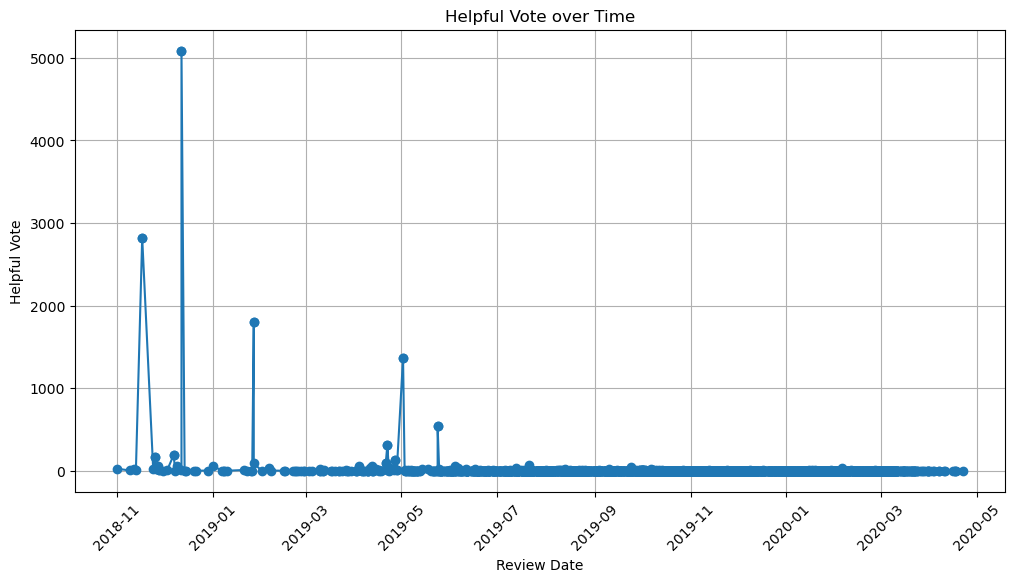

In [37]:
# Sort the data based on 'review_date' in chronological order
data_apple.sort_values(by='review_date', inplace=True)

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(data_apple['review_date'], data_apple['helpful_vote'], marker='o')
plt.xlabel('Review Date')
plt.ylabel('Helpful Vote')
plt.title('Helpful Vote over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

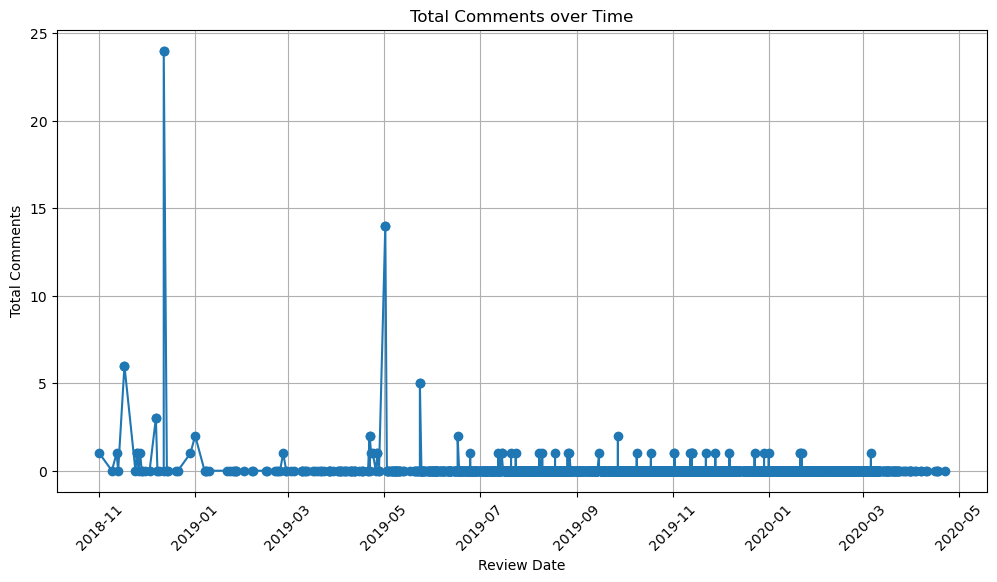

In [38]:
# Convert 'review_date' to datetime format (if not already in datetime)
data_apple['review_date'] = pd.to_datetime(data_apple['review_date'])

# Sort the data based on 'review_date' in chronological order
data_apple.sort_values(by='review_date', inplace=True)

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(data_apple['review_date'], data_apple['total_comments'], marker='o')
plt.xlabel('Review Date')
plt.ylabel('Total Comments')
plt.title('Total Comments over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [39]:
# Counting the top 200 most commonly-used words identified in the review_text column
import pandas as pd
from collections import Counter

# Convert the review_text column to a list of words
words = data_apple['review_text'].str.split(expand=True).stack()

# Count the frequency of each word
word_counts = Counter(words)

# Get the 100 most common words
top_words = word_counts.most_common(200)

print(top_words)

[('phone', 1606), ('good', 1460), ('iphone', 926), ('product', 854), ('battery', 745), ('camera', 590), ('best', 529), ('apple', 522), ('awesome', 457), ('life', 441), ('great', 420), ('xr', 397), ('amazon', 386), ('quality', 384), ('nice', 341), ('excellent', 341), ('price', 306), ('one', 302), ('amazing', 281), ('got', 241), ('face', 235), ('day', 208), ('buy', 199), ('mobile', 184), ('worth', 175), ('money', 172), ('time', 171), ('really', 165), ('performance', 161), ('screen', 158), ('go', 157), ('like', 156), ('k', 149), ('using', 147), ('use', 142), ('working', 140), ('superb', 140), ('love', 137), ('also', 137), ('better', 136), ('feature', 134), ('display', 133), ('fast', 130), ('issue', 127), ('value', 127), ('experience', 125), ('android', 124), ('get', 122), ('month', 119), ('everything', 119), ('happy', 118), ('ever', 113), ('delivery', 113), ('first', 113), ('super', 112), ('user', 112), ('overall', 109), ('bought', 106), ('work', 103), ('perfect', 98), ('used', 98), ('dea

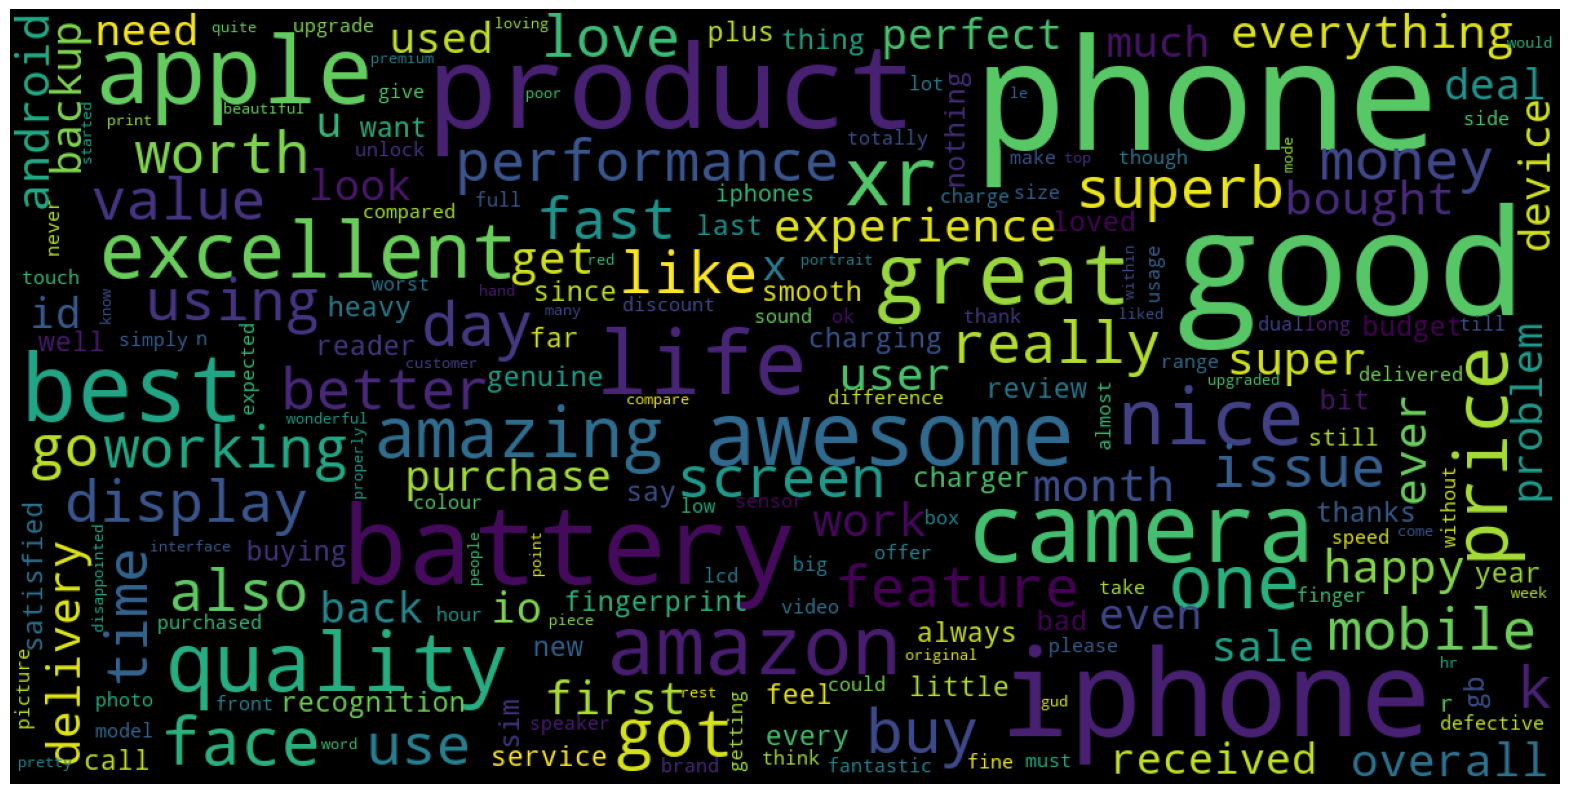

In [40]:
# Creating a word cloud for the most frequently used words in the review_text column

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

def show_wordcloud(data, title = None):
    word_freq = Counter(data.str.cat(sep=' ').split())
    wordcloud = WordCloud(
        background_color = 'black',
        max_words = 250,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate_from_frequencies(word_freq)
    
    plt.figure(figsize = (20, 20))
    plt.imshow(wordcloud)
    plt.axis("off")
    if title:
        plt.title(title, fontsize = 20)
    plt.savefig('new_wordcloud.png')
    plt.show()
    
show_wordcloud(data_apple["review_text"])


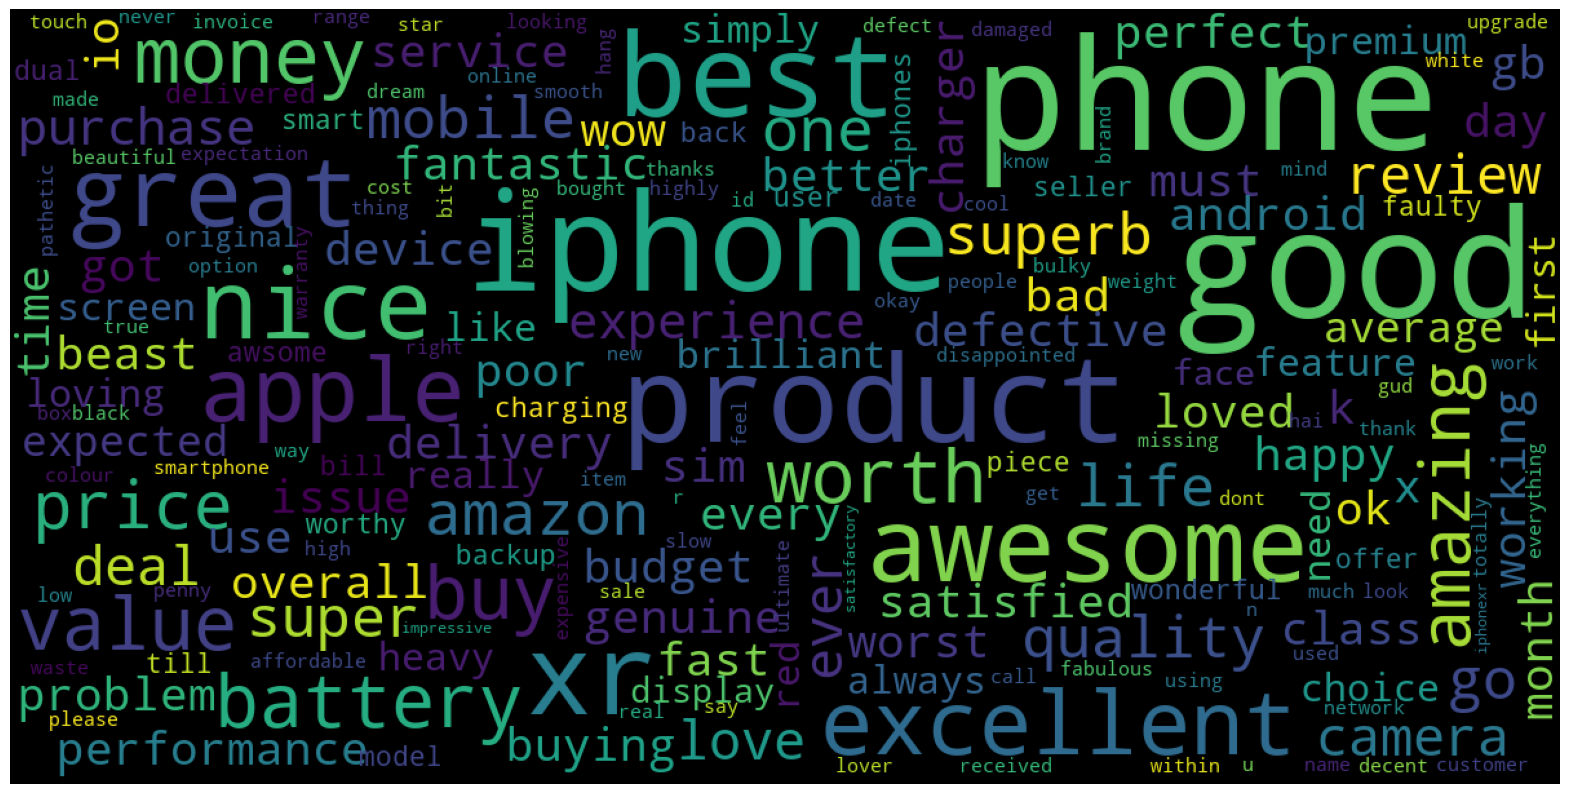

In [41]:
# Creating a word cloud for the most frequently used words in the review_title column

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

def show_wordcloud(data, title = None):
    word_freq = Counter(data.str.cat(sep=' ').split())
    wordcloud = WordCloud(
        background_color = 'black',
        max_words = 250,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate_from_frequencies(word_freq)
    
    plt.figure(figsize = (20, 20))
    plt.imshow(wordcloud)
    plt.axis("off")
    if title:
        plt.title(title, fontsize = 20)
    plt.savefig('new_wordcloud.png')
    plt.show()
    
show_wordcloud(data_apple["review_title"])


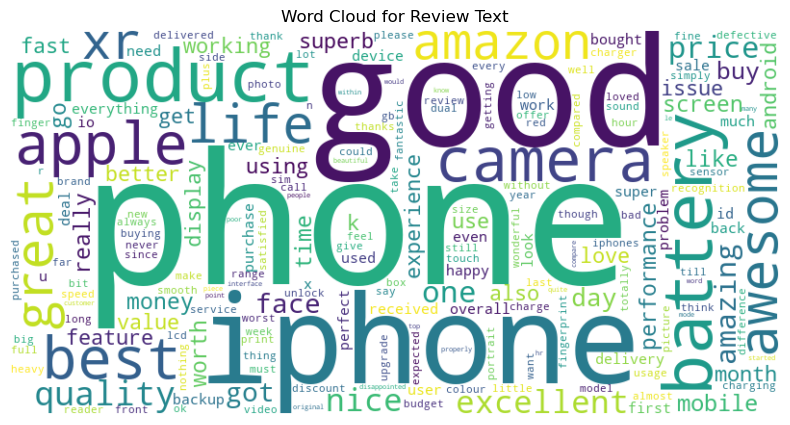

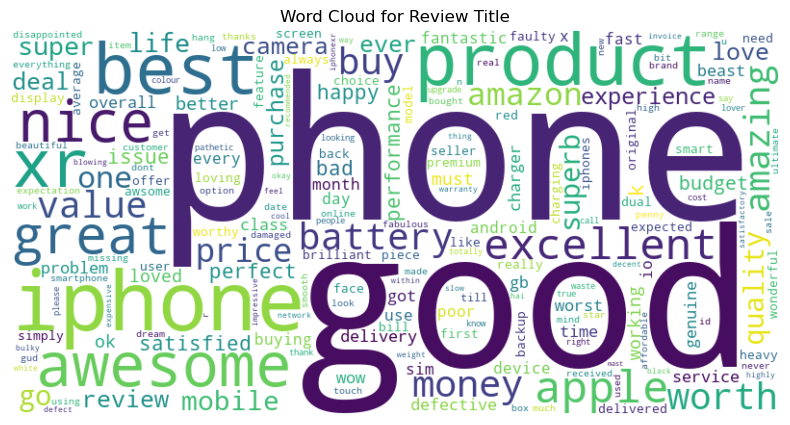

In [42]:
# Function to get the most frequent words from the  reveiew_text and review title columns
def get_top_words(text, n):
    word_list = text.split()
    word_freq = {}
    for word in word_list:
        word_freq[word] = word_freq.get(word, 0) + 1
    sorted_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
    top_words = dict(sorted_words[:n])
    return top_words

# Get the top 250 most frequent words from 'review_text'
top_words_review_text = get_top_words(" ".join(text for text in data_apple['review_text']), 250)

# Get the top 250 most frequent words from 'review_title'
top_words_review_title = get_top_words(" ".join(text for text in data_apple['review_title']), 250)

# Create a word cloud for the top 250 most frequent words in 'review_text'
wordcloud_review_text = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_words_review_text)

# Create a word cloud for the top 250 most frequent words in 'review_title'
wordcloud_review_title = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_words_review_title)

# Plot the word cloud for 'review_text'
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_review_text, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Review Text')
plt.show()

# Plot the word cloud for 'review_title'
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_review_title, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Review Title')
plt.show()

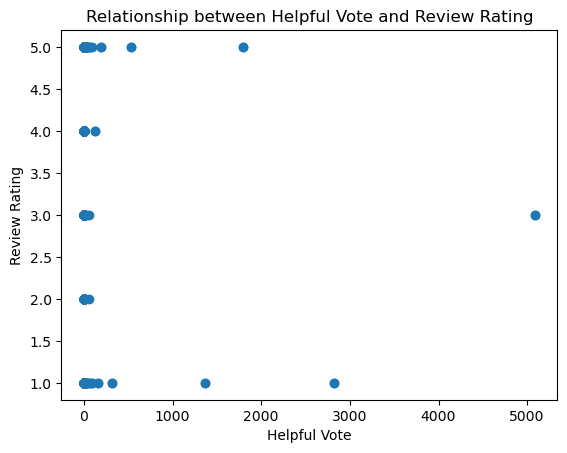

In [43]:
plt.scatter(data_apple['helpful_vote'], data_apple['review_rating'])
plt.xlabel('Helpful Vote')
plt.ylabel('Review Rating')
plt.title('Relationship between Helpful Vote and Review Rating')
plt.show()

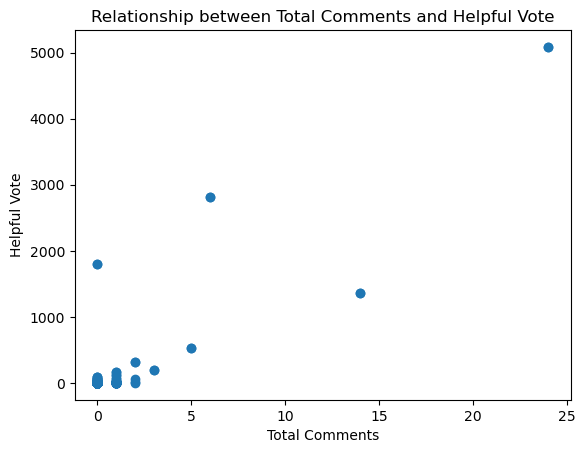

In [44]:
# Plot the relationship between total_comments and helpful_votes
plt.scatter(data_apple['total_comments'], data_apple['helpful_vote'])
plt.xlabel('Total Comments')
plt.ylabel('Helpful Vote')
plt.title('Relationship between Total Comments and Helpful Vote')
plt.show()

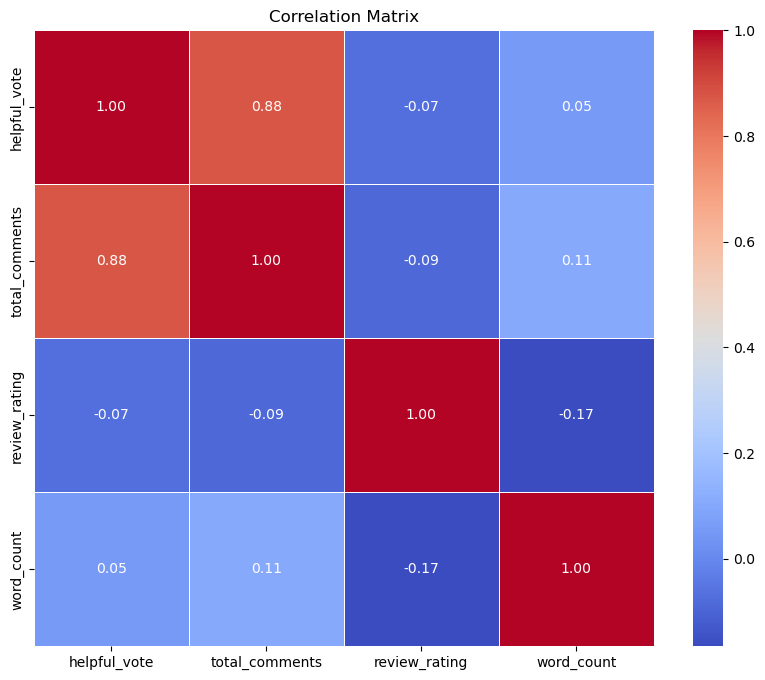

In [45]:
# Calculate the correlation matrix
numeric_columns = ['helpful_vote', 'total_comments', 'review_rating', 'word_count']
correlation_matrix = data_apple[numeric_columns].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Model development

In [46]:
# Importing the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

C:\Users\user\anaconda3\envs\myanal\lib\site-packages\requests\__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.14) or chardet (None)/charset_normalizer (3.2.0) doesn't match a supported version!
  warnings.warn(


In [47]:
# Label the sentiment
threshold = 3.0
data_apple['review_rating'] = data_apple['review_rating'].astype(float)
data_apple['sentiment'] = np.where(data_apple['review_rating'] >= threshold, 'Positive', 'Negative')

In [48]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(data_apple['review_text'], data_apple['sentiment'], test_size=0.2, random_state=42)

In [49]:
# Tokenize the text data
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [50]:
# Padding the sequences of the training data and test data
X_train_padded = pad_sequences(X_train_sequences)
X_test_padded = pad_sequences(X_test_sequences, maxlen=X_train_padded.shape[1])

In [51]:
# Create the OneHotEncoder object
onehot_encoder = OneHotEncoder()

In [52]:
# Convert y_train and y_test to NumPy arrays and reshape them
y_train_reshaped = y_train.to_numpy().reshape(-1, 1)
y_test_reshaped = y_test.to_numpy().reshape(-1, 1)

In [53]:
# Fit and transform y_train
y_train_encoded = onehot_encoder.fit_transform(y_train_reshaped).toarray()

# Transform y_test
y_test_encoded = onehot_encoder.transform(y_test_reshaped).toarray()

In [54]:
# Apply data augmentation with SMOTE
oversampler = SMOTE()
X_train_augmented, y_train_augmented = oversampler.fit_resample(X_train_padded, y_train_encoded)

In [55]:
# Building the Recurrent Neural Network (RNN) model
model = Sequential()
model.add(Embedding(10000, 32, input_length=X_train_padded.shape[1]))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))  # Using 1 unit in the output layer and 'sigmoid' activation for binary classification of the sentiments
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [56]:
# Train the model
model.fit(X_train_augmented, y_train_augmented, epochs=20, batch_size=32)


Epoch 1/20
232/232 [==============================] - 13s 43ms/step - loss: 0.6022 - accuracy: 0.6711
Epoch 2/20
232/232 [==============================] - 10s 43ms/step - loss: 0.5033 - accuracy: 0.7712
Epoch 3/20
232/232 [==============================] - 10s 44ms/step - loss: 0.4490 - accuracy: 0.8077
Epoch 4/20
232/232 [==============================] - 10s 43ms/step - loss: 0.3999 - accuracy: 0.8336
Epoch 5/20
232/232 [==============================] - 10s 43ms/step - loss: 0.3566 - accuracy: 0.8567
Epoch 6/20
232/232 [==============================] - 10s 43ms/step - loss: 0.3235 - accuracy: 0.8694
Epoch 7/20
232/232 [==============================] - 10s 45ms/step - loss: 0.2967 - accuracy: 0.8863
Epoch 8/20
232/232 [==============================] - 10s 43ms/step - loss: 0.2733 - accuracy: 0.8933
Epoch 9/20
232/232 [==============================] - 11s 47ms/step - loss: 0.2533 - accuracy: 0.9005
Epoch 10/20
232/232 [==============================] - 10s 43ms/step - loss: 0.232

In [57]:
# Generate predictions for the test data
y_pred_prob = model.predict(X_test_padded)
y_pred_labels = (y_pred_prob >= 0.5).astype(int).flatten()  # Convert probabilities to binary labels (0 or 1)

32/32 [==============================] - 1s 14ms/step


# Model evaluation

In [58]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test_encoded[:, 1], y_pred_labels)
precision = precision_score(y_test_encoded[:, 1], y_pred_labels)
recall = recall_score(y_test_encoded[:, 1], y_pred_labels)
f1 = f1_score(y_test_encoded[:, 1], y_pred_labels)

# Generate classification report
classification_report = classification_report(y_test_encoded[:, 1], y_pred_labels)


In [59]:
# Print the evaluation results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Classification Report:\n", classification_report)

Accuracy: 0.7914171656686627
Precision: 0.9566929133858267
Recall: 0.8055248618784531
F1-score: 0.8746250749850031
Classification Report:
               precision    recall  f1-score   support

         0.0       0.27      0.66      0.38        97
         1.0       0.96      0.81      0.87       905

    accuracy                           0.79      1002
   macro avg       0.61      0.73      0.63      1002
weighted avg       0.89      0.79      0.83      1002



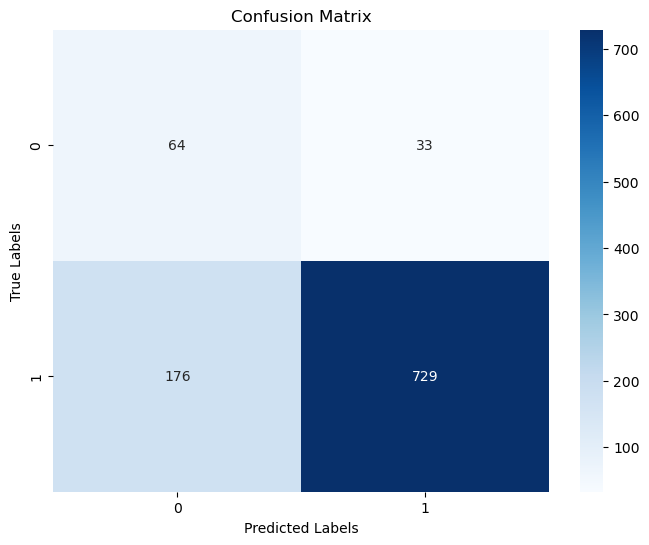

In [60]:
# Generate confusion matrix
cm = confusion_matrix(y_test_encoded[:, 1], y_pred_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [61]:
data_apple.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5010 entries, 40 to 4581
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   helpful_vote         5010 non-null   Int64         
 1   total_comments       5010 non-null   int64         
 2   review_date          5010 non-null   datetime64[ns]
 3   review_text          5010 non-null   object        
 4   review_rating        5010 non-null   float64       
 5   profile_name         5010 non-null   object        
 6   review_title         5010 non-null   object        
 7   review_rating_label  5010 non-null   object        
 8   word_count           5010 non-null   int64         
 9   sentiment            5010 non-null   object        
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 564.5+ KB


In [62]:
data_apple.head()

,helpful_vote,total_comments,review_date,review_text,review_rating,profile_name,review_title,review_rating_label,word_count,sentiment
40,25,1,2018-11-01,extremely easy use good specification,5.0,amit singha roy,worthy buy,Excellent,5,Positive
1112,3,0,2018-11-09,nice,5.0,madhuri rasiklal gaglani,apple xr,Excellent,1,Positive
45,21,1,2018-11-12,beautiful fast stylish iphone ever,5.0,sushil nagpal,beautiful fast stylish iphone ever,Excellent,5,Positive
171,7,0,2018-11-13,best mobile compare apple mobile,5.0,saikarthik,better buy,Excellent,5,Positive
1,2822,6,2018-11-17,bad experience iphone xr phone back camera fou...,1.0,amazon customer,buy iphone xr amazon,Very Bad,22,Negative


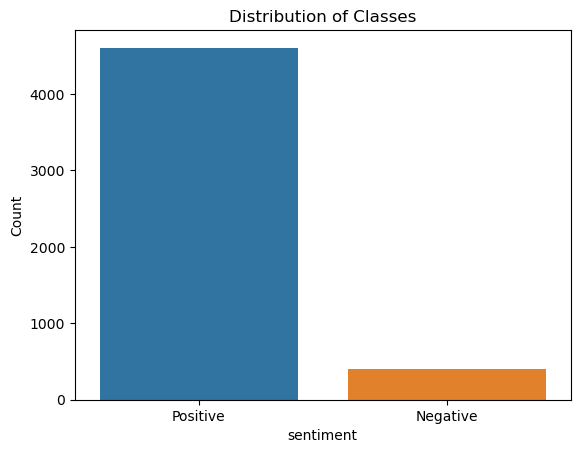

In [63]:
# checking for the balance between the two classes in the sentiment column, which contains the target variable distribution
sns.countplot(data=data_apple, x='sentiment')
plt.title('Distribution of Classes')
plt.xlabel('sentiment')
plt.ylabel('Count')
plt.show()

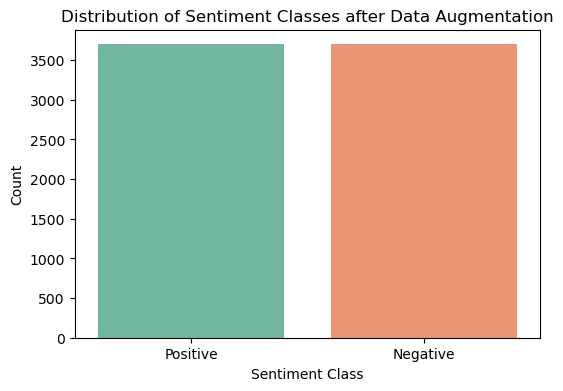

In [64]:
# Convert the augmented y_train_augmented to a 1-dimensional array
y_train_augmented_1d = y_train_augmented[:, 0]

# Map the integer labels to appropriate sentiment labels
y_train_augmented_sentiment = np.where(y_train_augmented_1d == 0, 'Negative', 'Positive')

# Convert the augmented y_train_augmented to a DataFrame
y_train_augmented_df = pd.DataFrame({'sentiment': y_train_augmented_sentiment})

# Plot the count of each class in the augmented data
plt.figure(figsize=(6, 4))
sns.countplot(data=y_train_augmented_df, x='sentiment', palette='Set2')
plt.xlabel('Sentiment Class')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Classes after Data Augmentation')
plt.show()


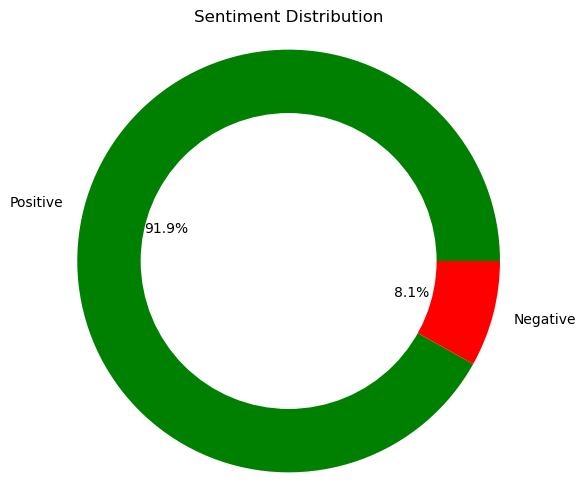

In [65]:
sentiment_counts = data_apple['sentiment'].value_counts()
labels = ['Positive', 'Negative']

# Create a donut chart
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=labels, autopct='%1.1f%%', colors=['green', 'red'])

# Add a white circle in the center to create the donut chart
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Add a title
plt.title('Sentiment Distribution')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the chart
plt.show()


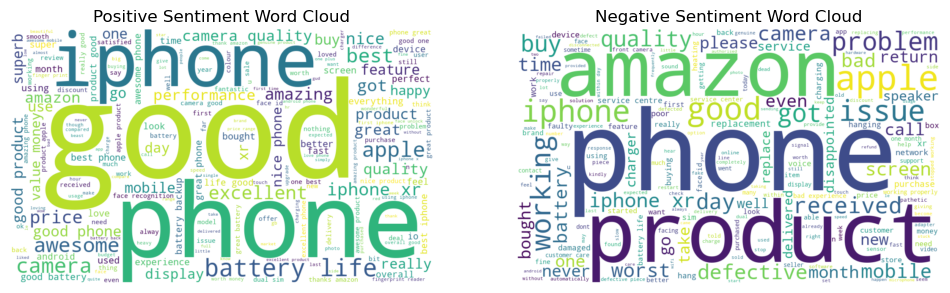

In [66]:
# Create separate datasets for positive and negative sentiments
positive_reviews = data_apple[data_apple['sentiment'] == 'Positive']
negative_reviews = data_apple[data_apple['sentiment'] == 'Negative']

# Concatenate the review_text of positive and negative sentiments
positive_text = " ".join(positive_reviews['review_text'])
negative_text = " ".join(negative_reviews['review_text'])

# Generate word clouds for positive and negative sentiments
positive_wordcloud = WordCloud(width=1000, height=600, background_color='white').generate(positive_text)
negative_wordcloud = WordCloud(width=1000, height=600, background_color='white').generate(negative_text)

# Plot the word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Sentiment Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Sentiment Word Cloud')
plt.axis('off')

plt.show()

In [67]:
data_apple.to_csv('final_dataset_with_sentiment.csv', index=False)